# Lecture 4: Probability Intuition and Random Simulation 
***

In this notebook you'll see how we can use Numpy to run simple probability simulations.  

We'll need Numpy and Matplotlib for this notebook, so let's load and setup those libraries. 

In [1]:
import numpy as np 
import matplotlib.pylab as plt
%matplotlib inline 

### Estimating Simple Probabilities 
*** 

In this example we'll see how we can use the Numpy function [random.choice](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html) to make random draws from a sample space and estimate the probability of certain random events. As a simple example, consider a fair coin.  We can represent the sample space for this coin with a Numpy array with two entries: "H" and "T"

In [2]:
coin = np.array(["H", "T"])
print(coin)

['H' 'T']


We can simulate flipping the coin using np.random.choice, which returns a randomly selected entry from a Numpy array.  If no optional parameters are passed in, np.random.choice assigns an **equal probability** to each entry of the array.   

In [3]:
for ii in range(5):
    print(np.random.choice(coin), end=" ")

H H H H T 

We can simulate many flips of the coin and store the results in an array by passing the size parameter to np.random.choice. 

In [4]:
flips = np.random.choice(coin, size=10)
print(flips)

['T' 'H' 'T' 'T' 'T' 'H' 'T' 'T' 'T' 'H']


Now suppose we want to run a simple simulation to estimate the probability  that the coin comes up Heads (which we expect to be $0.5$ because the coin is fair).  One way to do this is to do a large number of coin flips and then divide the number of flips that come up Heads by the total number of flips. The following code flips the coin 50 times and computes the desired ratio: 

In [5]:
np.random.seed(12345)
flips = np.random.choice(coin, size=50)
approx_prob_heads = np.sum(flips == "H") / len(flips)
print("the probability of heads is approximately {:.3f}".format(approx_prob_heads))

the probability of heads is approximately 0.360


OK, so the simulation estimated that the probability of the coin coming up heads is $0.36$, which is pretty far off from the $0.5$ that we expected.  This is likely because we didn't do very many coin flips.  Let's see what happens if we rerun the simulation with $500$ coin flips. 

In [6]:
flips = np.random.choice(coin, size=500)
approx_prob_heads = np.sum(flips == "H") / len(flips)
print("the probability of heads is approximately {:.3f}".format(approx_prob_heads))

the probability of heads is approximately 0.512


With $500$ coin flips our estimate came out to be $0.512$, which seems much better.  It's an interesting exercise to make a plot of the running estimate of the probability as the number of coin flips increases.  We'll use the same random sequence of coin flips from the previous simulation.  


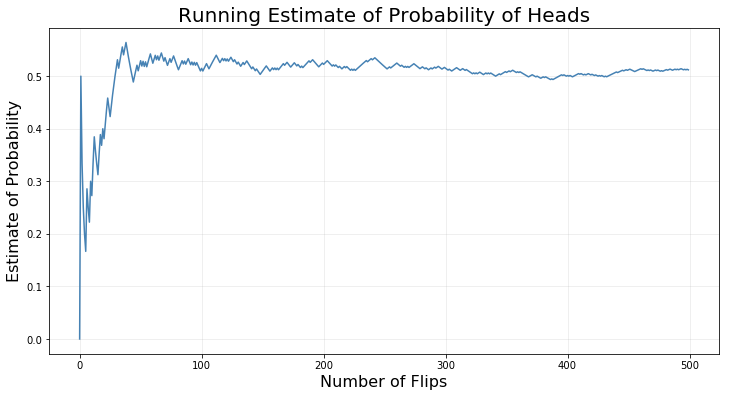

In [7]:
p = np.zeros(len(flips))
for ii in range(len(p)):
    p[ii] = np.sum(flips[:ii+1] == "H") / len(flips[:ii+1])
    
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(p, color="steelblue")
ax.set_title("Running Estimate of Probability of Heads", fontsize=20)
ax.set_xlabel("Number of Flips", fontsize=16)
ax.set_ylabel("Estimate of Probability", fontsize=16)

ax.grid(True, alpha=0.25)

Notice that for very few flips the estimate of the probability is understandably poor.  But as the number of flips increases the estimate settles down to very close to the expected $0.5$. 

### Exercise 1 - The Biased Coin
***

Now let's make it more interesting by considering a biased coin where the probability of the coin landing heads is $0.75$.  We can alter the probability with which np.random.choice selects a particular entry of the sample space array by passing in an optional array of probabilities, e.g. p = [0.75, 0.25].  Rerun the simulation from above with the biased coin by passing in such an array of probabilities into np.random.choice. Does your running estimate of the probability of Heads seem to settle down to $0.75$ as expected?  If not, try increasing the number of coin flips until it does. 

### Exercise 2 - Double Tails
***

Suppose now that you want to estimate the probability that if you flip two fair coins they both come up tails.  First, compute the exact probability by hand, so you know what to expect from your simulation. 

**Solution**: There are $2 \times 2 = 4$ possible outcomes for the two coin flips: "HH", "HT", "TH", "TT".  The event that both coins come up tails is $E = \{ TT \}$. We then have 

$$
p(\{TT\}) = \frac{|\{TT\}|}{|\{HH, HT, TH, TT\}|} = \frac{1}{4}
$$

Now write a simple simulation to estimate the probability of getting two tails when flipping two coins.  Does your estimate from your simulation agree with the result from your computation by hand? 

Estimated probability after 1000 double-flips is 0.264


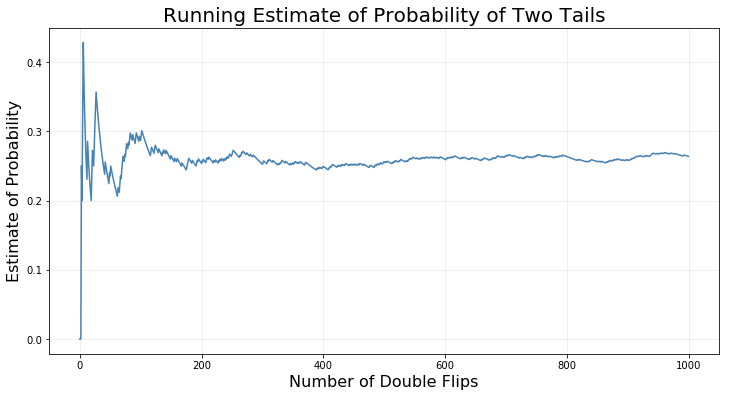

In [8]:
two_coins = np.array(["HH", "HT", "TH", "TT"])

num_flips = 1000
flips = np.random.choice(two_coins, size=num_flips)
p = np.zeros(len(flips))
for ii in range(len(flips)):
    p[ii] = np.sum(flips[:ii+1]=="TT") / len(flips[:ii+1])
    
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(p, color="steelblue")
ax.set_title("Running Estimate of Probability of Two Tails", fontsize=20)
ax.set_xlabel("Number of Double Flips", fontsize=16)
ax.set_ylabel("Estimate of Probability", fontsize=16)

ax.grid(True, alpha=0.25)

print("Estimated probability after {} double-flips is {:.3f}".format(num_flips, p[-1]))

### Exercise 3 - Roll the Easy Seven
***

Suppose you roll a pair of fair six-sided dice.  Compute the probability that the two rolls sum to $7$ by hand. 

**Solution**: There are $6 \times 6 = 36$ possible two-dice combinations, each with equal probability of occurring.  Of those 36 combinations there are six that sum to 7.  They are 

$$
\{(1,6), (2,5), (3,4), (4,3), (5,2), (6,1)\}
$$

We then have that the probability of rolling a sum-to-seven is 

$$
p(\texttt{sum-to-seven}) = \frac{6}{36} = \frac{1}{6} = 0.1\overline{66}
$$

Now write a simple simulation to estimate the probability. 

Estimated probability after 5000 rolls is 0.163


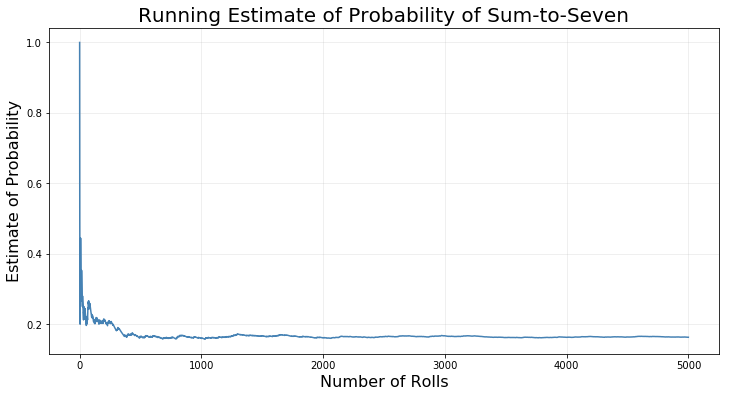

In [9]:
die = np.array([1,2,3,4,5,6])

num_rolls = 5000
rolls1 = np.random.choice(die, size=num_rolls)
rolls2 = np.random.choice(die, size=num_rolls)
p = np.zeros(num_rolls)
for ii in range(num_rolls):
    p[ii] = np.sum(rolls1[:ii+1] + rolls2[:ii+1] == 7) / len(rolls1[:ii+1])
    
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(p, color="steelblue")
ax.set_title("Running Estimate of Probability of Sum-to-Seven", fontsize=20)
ax.set_xlabel("Number of Rolls", fontsize=16)
ax.set_ylabel("Estimate of Probability", fontsize=16)

ax.grid(True, alpha=0.25)

print("Estimated probability after {} rolls is {:.3f}".format(num_rolls, p[-1]))

### Exercise 4 - The Birthday Game 
***

Suppose you have $n$ people in a room.  What is the probability that two or more people in the room have the same birthday? 

In [10]:
def random_bday():
    
    # Dictionary telling how many days are in each month  
    days_in_month = {"Jan" : 31, "Feb" : 28, "Mar" : 31, "Apr" : 30, "May" : 31, "Jun" : 30, "Jul" : 31, "Aug" : 31, 
                     "Sep" : 30, "Oct" : 31, "Nov" : 30, "Dec" : 31}
    # Array of months 
    months = np.array(list(days_in_month.keys()))
    
    # Probability of randomly selecting each month 
    month_probs = np.array(list(days_in_month.values()))/365
    
    # Draw random month 
    m = np.random.choice(months, p=month_probs)
    
    # Draw random day of month 
    d = np.random.choice(range(1,days_in_month[m]+1))
    
    return m + " " + str(d)
    

In [11]:
def birthday_game(num_people):
    
    # draw random birthday for each person in the room 
    birthdays = [random_bday() for ii in range(num_people)]
    
    # check if there is a birthday match 
    return True if len(set(birthdays)) < len(birthdays) else False 


In [12]:
def birthday_sim(num_people, num_trials=1000):
    
    # Simulate num_trials of the birthday game 
    random_rooms = [birthday_game(num_people) for ii in range(num_trials)]
    
    # Print fraction of trials where birthday match occurred 
    print('The approximate probability of a birthday match in a room of {} people is {:.16f}'.format(num_people,np.sum(random_rooms)/num_trials))

In [13]:
birthday_sim(60)

The approximate probability of a birthday match in a room of 60 people is 0.9970000000000000


### Exercise 4 - Number of Flips Until Double Heads
***

Later we'll see that we can use probabilities to compute average quantities of interest.  For instance, we could compute the average number of coin flips we have to do until we flip two Heads in a row.  Can you write a simulation to estimate this? Can you extend this to $m$ Heads in a row? 

In [14]:
def heads_in_a_row(m=2):
    
    hist = np.random.choice(coin, size=m)
    
    ctr = m 
    
    while True:
        if np.all(hist == "H"):
            return ctr 
        else:
            hist[:m-1] = hist[1:]
            hist[-1] = np.random.choice(coin)
            ctr += 1 
    
def in_a_row_sim(n=1000, m=2):
    
    times = [heads_in_a_row(m) for ii in range(n)]
    mean_time = np.mean(times)
    print("on average we get {} heads in a row after {:.3f} flips".format(m, mean_time))
    
in_a_row_sim(n=10000, m=3)

on average we get 3 heads in a row after 14.074 flips


### Challenge Exercise - Poker Hands
***

Consider drawing a hand of five-card poker.  Write a simulation to estimate the probability of being dealt common hands like two pair, a straight, a flush, or a full house.  You can check your estimate for the probability of particular hands [here](http://www.math.hawaii.edu/~ramsey/Probability/PokerHands.html). Note that there are around 2.5 million distinct hands in 5-card poker, so to get accurate probability estimates you'll probably have to simulate **many** hands.   

Notice that drawing cards from a deck is slightly different than flipping a coin and rolling a die, because once we've drawn a card, that card is no longer in the deck for the remaining draws.  You can implement this behavior with np.random.choice using the parameter replace=False. 

In [15]:
deck = np.array([suit+val for suit in ["H", "D", "S", "C"] for val in ["A", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13"]])   

def is_straight(hand):
    
    values = set(card[1:] for card in hand)
    
    if len(values) != 5:
        return False
    else:
        series = []
        if "A" in values:
            series.append(np.array([1 if val == "A" else int(val) for val in values]))
            series.append(np.array([14 if val == "A" else int(val) for val in values]))
        else:
            series.append(np.array([int(val) for val in values]))
        for s in series: 
            if np.max(s) - np.min(s) == 4:
                return True 
        return False
            
def is_high_straight(hand):
    vals = set(card[1:] for card in hand)
    return True if vals == set(["10", "11", "12", "13", "A"]) else False 

def is_same_suit(hand):
    suits = set(card[0] for card in hand)
    return True if len(suit) == 1 else False  

def n_of_a_kind(hand, n):
    vals = [card[1:] for card in hand]
    counts = np.array([vals.count(val) for val in set(vals)])
    return np.sum(counts==n)
    


In [16]:
num_hands = 3000000
hands = [np.random.choice(deck, size=5, replace=False) for ii in range(num_hands)]

prob_two_pair = np.sum([n_of_a_kind(hand, 2) == 2 for hand in hands])/len(hands)
print("The approximate probability of two pair is {:.8f}".format(prob_two_pair))

prob_trip = np.sum([n_of_a_kind(hand, 3) == 1 for hand in hands])/len(hands)
print("The approximate probability of a three of a kind is {:.8f}".format(prob_trip))

prob_full = np.sum([(n_of_a_kind(hand, 2) == 1) and (n_of_a_kind(hand,3) == 1) for hand in hands])/len(hands)
print("The approximate probability of a three of a full house is {:.8f}".format(prob_full))

prob_quad = np.sum([n_of_a_kind(hand, 4) == 1 for hand in hands])/len(hands)
print("The approximate probability of a four of a kind is {:.8f}".format(prob_quad))

prob_straight = np.sum([is_straight(hand) and not is_same_suit(hand) for hand in hands])/len(hands)
print("The approximate probability of a straight is {:.8f}".format(prob_straight))

prob_flush = np.sum([is_flush(hand) and not is_straight(hand) for hand in hands])/len(hands)
print("The approximate probability of a flush is {:.8f}".format(prob_flush))

prob_straight_flush = np.sum([is_flush(hand) and is_straight(hand) and not is_high_straight(hand) for hand in hands])/len(hands)
print("The approximate probability of a straight flush is {:.8f}".format(prob_straight_flush))

prob_royal_flush = np.sum([is_flush(hand) and is_high_straight(hand) for hand in hands])/len(hands)
print("The approximate probability of a royal flush is {:.8f}".format(prob_royal_flush))

The approximate probability of two pair is 0.04747167
The approximate probability of a three of a kind is 0.02271833
The approximate probability of a three of a full house is 0.00145900
The approximate probability of a four of a kind is 0.00024800


NameError: name 'suit' is not defined